## Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

#### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [2]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### There is no Missing value in the datasert, hence no need to handle them.

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### All the columns are already converted into machine readable form

In [5]:
## Standardisation

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select the columns to be scaled
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach']

# Fit and transform the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


#### Q2. Split the dataset into a training set (70%) and a test set (30%).

In [6]:
#Ans-

from sklearn.model_selection import train_test_split

# Split dataset into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [7]:
#Ans-

from sklearn.ensemble import RandomForestClassifier

# Instantiate the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)

# Fit the model on the training data
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=10)

#### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [8]:
#Ans-

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.8351648351648352
Precision: 0.8431372549019608
Recall: 0.86
F1 score: 0.8514851485148515


#### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

Top 5 Features:
ca :  0.13989060205495865
cp :  0.13970387496899173
thalach :  0.10797045760103101
oldpeak :  0.10439485054226504
thal :  0.10036922658465185


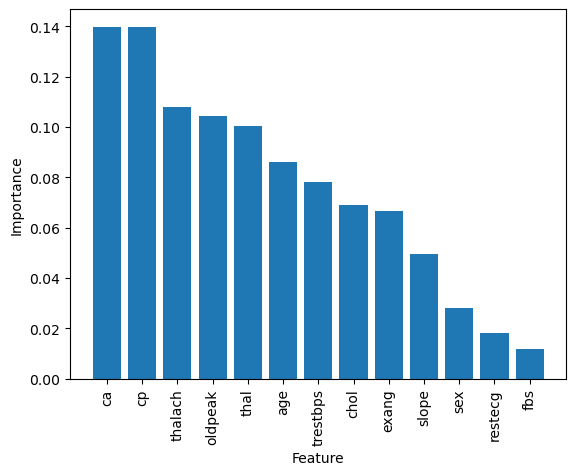

In [9]:
#Ans

import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
importances = rfc.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top 5 most important features
top_5_indices = indices[:5]

# Print the top 5 most important features and their importances
print("Top 5 Features:")
for i in top_5_indices:
    print(feature_names[i], ": ", importances[i])

# Visualize the feature importances using a bar chart
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


#### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [10]:
#Ans-

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rcf=RandomForestClassifier()

In [11]:
from sklearn.model_selection import RandomizedSearchCV

cv=RandomizedSearchCV(rcf,param_distributions=param_grid,scoring='accuracy',cv=5,verbose=3)

In [12]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/5] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.860 total time=   0.4s
[CV 3/5] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.738 total time=   0.4s
[CV 4/5] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.905 total time=   0.4s
[CV 5/5] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.738 total time=   0.4s
[CV 1/5] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.714 total tim

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy', verbose=3)

In [13]:
# Evaluate the model with the best hyperparameters on the test data
y_pred = cv.predict(X_test)
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))


Accuracy on test set:  0.8241758241758241


#### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [15]:
#Ans-

# Print the best hyperparameters and corresponding performance metrics
print("Best Hyperparameters:", cv.best_params_)
print("Training Accuracy:", cv.best_score_)
print("Test Accuracy:", cv.score(X_test, y_test))
print("Precision:", precision_score(y_test, cv.predict(X_test)))
print("Recall:", recall_score(y_test, cv.predict(X_test)))
print("F1 Score:", f1_score(y_test, cv.predict(X_test)))


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 15}
Training Accuracy: 0.8345514950166113
Test Accuracy: 0.8241758241758241
Precision: 0.8269230769230769
Recall: 0.86
F1 Score: 0.8431372549019608


### Compare with default Model

In [16]:
# Create a default random forest classifier
rf_default = RandomForestClassifier()

# Train the default model on the training set
rf_default.fit(X_train, y_train)

# Evaluate the default model on the test set
print("Default Model Performance:")
print("Training Accuracy:", rf_default.score(X_train, y_train))
print("Test Accuracy:", rf_default.score(X_test, y_test))
print("Precision:", precision_score(y_test, rf_default.predict(X_test)))
print("Recall:", recall_score(y_test, rf_default.predict(X_test)))
print("F1 Score:", f1_score(y_test, rf_default.predict(X_test)))


Default Model Performance:
Training Accuracy: 1.0
Test Accuracy: 0.8021978021978022
Precision: 0.82
Recall: 0.82
F1 Score: 0.82


### Conclusion

In [ ]:
The training accuracy of the default model is 1, which shows the overfiting, whereas the training accuracy of the tuned model is 0.83. 
Apart from this, our tuned model has performed better than default model on all the aspects.

#### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [19]:
#Ans-

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Select the two most important features
feature1 = 'thalach'
feature2 = 'oldpeak'

rfc = RandomForestClassifier()
rfc.fit(X_train[['thalach','oldpeak']], y_train)


RandomForestClassifier()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


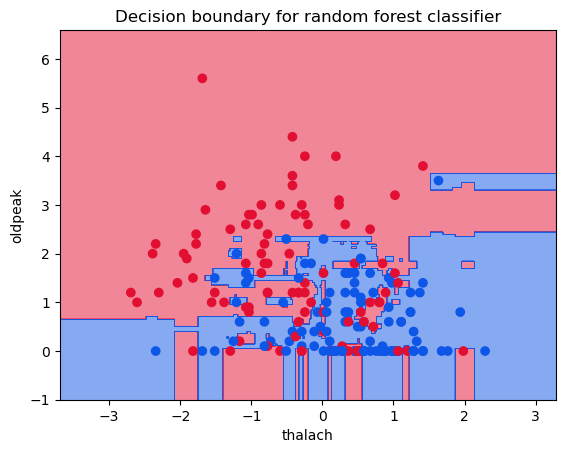

In [24]:
# Create a grid of points covering the range of the two features
x_min, x_max = X_train[feature1].min() - 1, X_train[feature1].max() + 1
y_min, y_max = X_train[feature2].min() - 1, X_train[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Use the trained random forest classifier to predict the class labels for each point in the grid
Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
cmap = ListedColormap(['#E30F32', '#0E56E7'])
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)

# Plot the training data points
plt.scatter(X_train[feature1], X_train[feature2], c=y_train, cmap=cmap)

# Add axis labels and a title
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision boundary for random forest classifier')
plt.show()

### Observation

####  Its hard to interpret the above decision boundry plot because the model trained for this plot was only trained on two features (the best features), and the model is having a hard time finding a concrete boundry between the two classed based on only two features. Because two features are not enough to separate one class from another properly.

## Limitations and Insights

### Well first of all there are only 303 samples in the dataset so its not enough for training a more accurate and robust model.
### The dataset is imbalanced so the model will always perform bad on classfying the minority class (unless we handle it by using a technique like upsampling, downsampling or SMOTE etc.)
### We're achieving 80 percent accuracy but like mentioned already the model is performing poorly on class 0 data and so i will never suggest such a model to be deployed without addressing the above mentioned issues.